In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Import the Dataset

In [25]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

# the classes of clothes depending from the output values 0 to 9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [22]:
#Shape show me the arrange of the tensors
print(tf.shape(train_images))
print(tf.shape(test_images))
#Size tells me the number of values inside
print(tf.size(train_images))
print(tf.size(test_images))

tf.Tensor([60000    28    28], shape=(3,), dtype=int32)
tf.Tensor([10000    28    28], shape=(3,), dtype=int32)
tf.Tensor(47040000, shape=(), dtype=int32)
tf.Tensor(7840000, shape=(), dtype=int32)


In [23]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [24]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

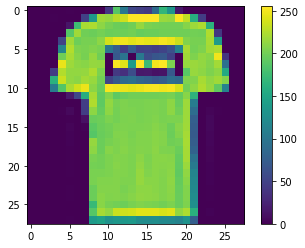

In [35]:
#Plot the image and set labells
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##### Data Preprocessing
We preprocess the data by dividing it into 255 so it became a value between 0 and 1

In [38]:
train_images = train_images / 255.0

test_images = test_images / 255.0

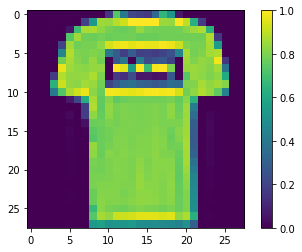

In [37]:
#Plot the image and set labells
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

#### Build the Model

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
#Training 
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 183us/sample - loss: 1.0857 - accuracy: 0.6603
Epoch 2/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.6398 - accuracy: 0.7689
Epoch 3/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.5652 - accuracy: 0.7966
Epoch 4/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.5227 - accuracy: 0.8151
Epoch 5/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4948 - accuracy: 0.8259
Epoch 6/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.4751 - accuracy: 0.8329
Epoch 7/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4601 - accuracy: 0.8387
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4478 - accuracy: 0.8424
Epoch 9/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.4382 - accuracy: 0.8464
Epoc

In [42]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 102us/sample - loss: 0.4578 - accuracy: 0.8370
Test accuracy: 0.837


In [43]:
#This will show the array of probabilities distributions
predictions = model.predict(test_images)

In [44]:
#Probabilities distributions
predictions[0]


array([4.1648471e-07, 6.9337638e-08, 4.2853758e-06, 6.5580480e-06,
       8.3535915e-06, 1.3371466e-01, 1.1925673e-05, 2.3488097e-01,
       3.0821448e-03, 6.2829059e-01], dtype=float32)

In [46]:
#Shows the biggest probability index matched with the class names
class_names[np.argmax(predictions[0])]

'Ankle boot'

#### Script Example of Comparison Between Images and Predictions

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

The prediction is: Pullover


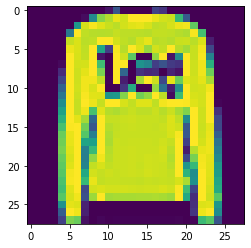

In [59]:
#Comparison of the result against the image
print("The prediction is:",class_names[np.argmax(predictions[1])])
plt.imshow(test_images[1])
plt.grid(False)
